In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
root_path = os.path.join(os.getcwd(), '..')
from src.utilities import color_map, labels

IMAGE_FOLDER = os.path.join(root_path, 'gfx/data_viz/')

paths = [
        os.path.join(root_path, 'src/data/PASTIS/ANNOTATIONS', f)\
        for f in os.listdir(os.path.join(root_path, 'src/data/PASTIS/ANNOTATIONS'))\
            if 'TARGET' in f
        ]
targets = [np.load(f) for f in paths]
shapes = [t.shape for t in targets]
segments = [t[0, :, :] for t in targets]

In [21]:
SAVE_FIGS = False

In [19]:
label_color = dict(zip(labels, color_map))

/Users/abel/Coding/Capgemini/DSRI-SatClass/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


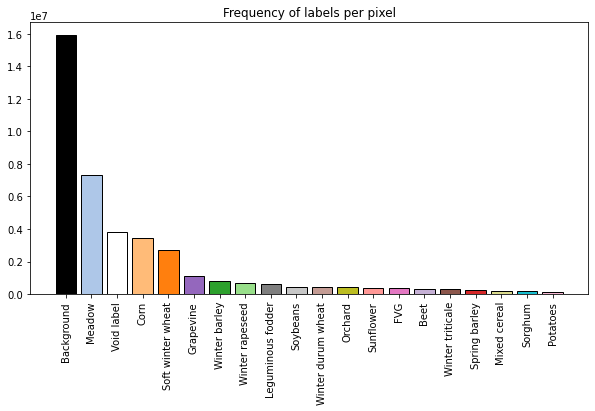

In [22]:
counts = [Counter(s.flatten()) for s in segments]
pixel_total = sum(counts, Counter())
pixel_total = {labels[k]: v for k, v in pixel_total.items()}
pixel_total = dict(sorted(pixel_total.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(
    pixel_total.keys(), 
    pixel_total.values(), 
    color=[label_color[l] for l in pixel_total.keys()],
    edgecolor='black',
)
ax.set_xticklabels(list(pixel_total.keys()), rotation=90)
ax.set_title('Frequency of labels per pixel')

if SAVE_FIGS: fig.savefig(os.path.join(IMAGE_FOLDER, 'pixel_frequency.png'), dpi=300, bbox_inches = "tight")
pass

/Users/abel/Coding/Capgemini/DSRI-SatClass/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


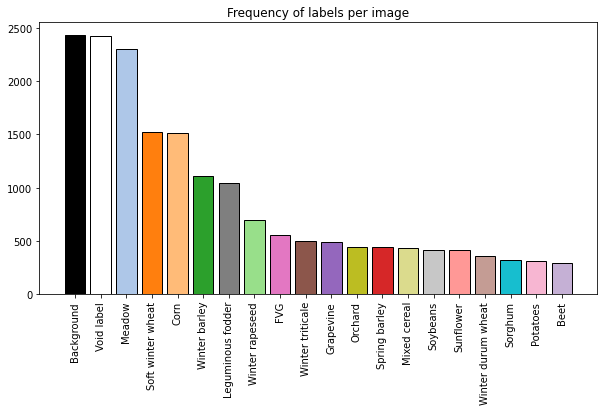

In [27]:
ocurrence = [Counter(list(c.keys())) for c in counts]

image_total_k = sum(ocurrence, Counter())
image_total = {labels[k]: v for k, v in image_total_k.items()}
image_total = dict(sorted(image_total.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(
    image_total.keys(), 
    image_total.values(), 
    color=[label_color[l] for l in image_total.keys()],
    edgecolor='black',
)
ax.set_xticklabels(labels=image_total.keys(), rotation=90)
ax.set_title('Frequency of labels per image')
if SAVE_FIGS: fig.savefig(os.path.join(IMAGE_FOLDER, 'image_frequency.png'), dpi=300, bbox_inches = "tight")
pass

In [47]:
ocurrence

[Counter({8: 1,
          0: 1,
          19: 1,
          16: 1,
          14: 1,
          6: 1,
          7: 1,
          2: 1,
          11: 1,
          12: 1,
          1: 1}),
 Counter({19: 1, 0: 1, 1: 1, 3: 1, 2: 1, 5: 1, 4: 1, 16: 1}),
 Counter({19: 1, 0: 1, 7: 1, 6: 1, 2: 1, 1: 1}),
 Counter({19: 1, 6: 1, 3: 1, 4: 1, 0: 1, 17: 1, 2: 1, 1: 1}),
 Counter({1: 1, 0: 1, 2: 1, 19: 1, 3: 1, 14: 1, 12: 1, 17: 1}),
 Counter({0: 1, 1: 1, 19: 1, 10: 1}),
 Counter({19: 1, 3: 1, 4: 1, 0: 1, 1: 1, 2: 1, 6: 1}),
 Counter({0: 1, 1: 1, 6: 1, 2: 1, 19: 1}),
 Counter({19: 1, 0: 1, 3: 1, 5: 1, 2: 1, 1: 1, 4: 1, 10: 1}),
 Counter({3: 1, 0: 1, 19: 1, 1: 1, 2: 1, 5: 1, 14: 1, 13: 1}),
 Counter({0: 1, 19: 1, 14: 1, 1: 1, 2: 1, 6: 1, 4: 1, 5: 1, 3: 1}),
 Counter({19: 1, 2: 1, 0: 1, 10: 1, 1: 1, 5: 1, 3: 1, 6: 1}),
 Counter({19: 1, 0: 1, 8: 1, 1: 1}),
 Counter({19: 1, 0: 1, 3: 1, 2: 1, 1: 1, 5: 1, 4: 1, 17: 1}),
 Counter({19: 1, 0: 1, 15: 1, 2: 1, 6: 1, 14: 1, 1: 1, 3: 1, 18: 1}),
 Counter({19: 1, 0: 

In [31]:
# Co-occurrence of labels
from itertools import product

co_occurence_matrix = np.zeros((len(labels), len(labels)))
co_counter = lambda x, y: sum([(x in o.keys() and y in o.keys()) for o in ocurrence])

for x, y in product(list(range(20)), repeat=2):
    if x >= y:
        continue
    else:
        co_occurence_matrix[x, y] = co_counter(x, y)
        co_occurence_matrix[y, x] = co_counter(x, y)


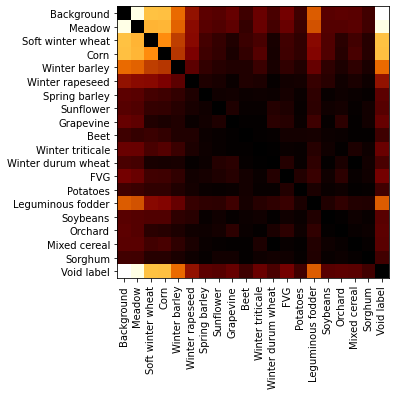

In [32]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.imshow(co_occurence_matrix, cmap='afmhot')
ax.set_xticks(list(range(20)), labels=labels, rotation=90)
ax.set_yticks(list(range(20)), labels=labels)

if SAVE_FIGS: fig.savefig(os.path.join(IMAGE_FOLDER, 'co_occur.png'), dpi=300, bbox_inches = "tight")
pass

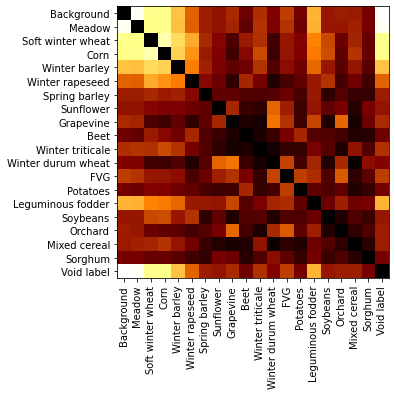

In [40]:
div_co_occurence_matrix = co_occurence_matrix.copy()
for x, y in product(list(range(20)), repeat=2):
    div_co_occurence_matrix[x,y] = co_occurence_matrix[x, y] / (image_total_k[x] + image_total_k[y])

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.imshow(div_co_occurence_matrix, cmap='afmhot')
ax.set_xticks(list(range(20)), labels=labels, rotation=90)
ax.set_yticks(list(range(20)), labels=labels)

if SAVE_FIGS: fig.savefig(os.path.join(IMAGE_FOLDER, 'co_occur.png'), dpi=300, bbox_inches = "tight")
pass

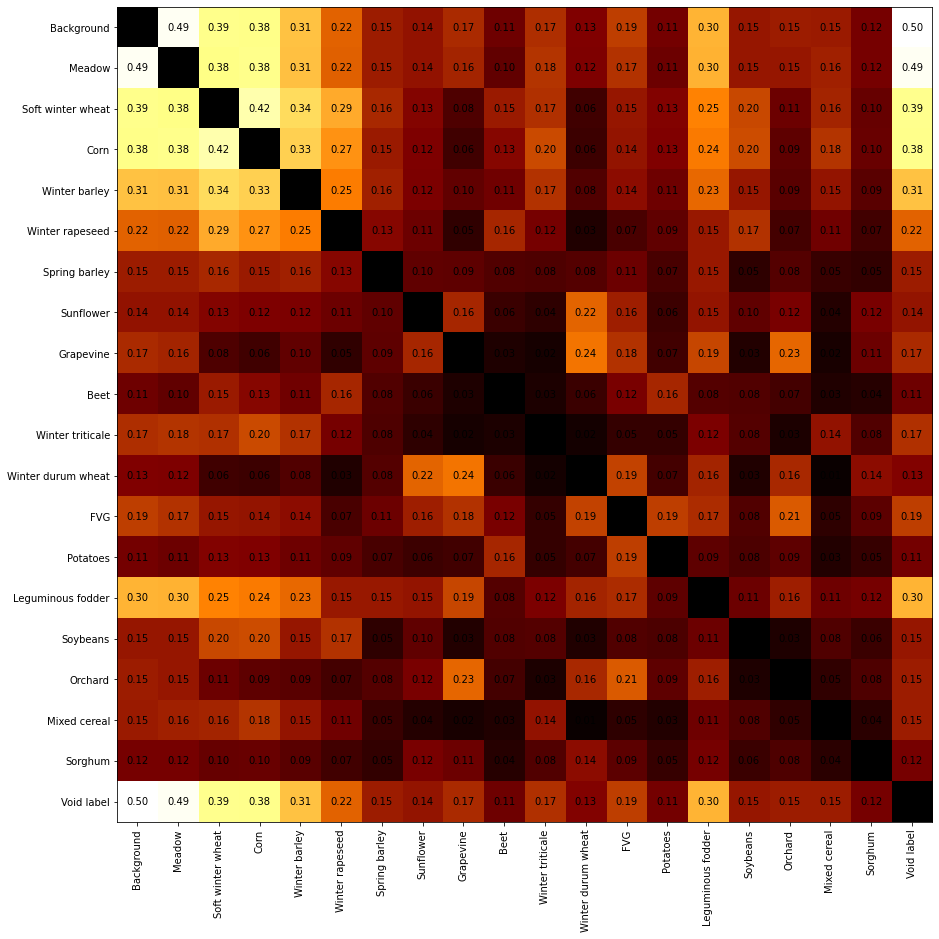

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.imshow(co_occurence_matrix, cmap='afmhot')
ax.set_xticks(list(range(20)), labels=labels, rotation=90)
ax.set_yticks(list(range(20)), labels=labels)

for (j, i), label in np.ndenumerate(co_occurence_matrix):
    ax.text(i, j, '{:.2f}'.format(label), ha='center', va='center')

if SAVE_FIGS: fig.savefig(os.path.join(IMAGE_FOLDER, 'co_occur_text.png'), dpi=300, bbox_inches = "tight")
pass

In [46]:
div_co_occurence_matrix.sum(axis=0), div_co_occurence_matrix.sum(axis=1)

(array([4.32717276, 4.26896404, 4.05309427, 3.98178752, 3.54279507,
        2.80408784, 2.05031573, 2.2309728 , 2.15325897, 1.70752498,
        1.9367154 , 1.99864712, 2.63399184, 1.8044581 , 3.37851545,
        1.96152162, 2.11021771, 1.71067147, 1.67490245, 4.33376416]),
 array([4.32717276, 4.26896404, 4.05309427, 3.98178752, 3.54279507,
        2.80408784, 2.05031573, 2.2309728 , 2.15325897, 1.70752498,
        1.9367154 , 1.99864712, 2.63399184, 1.8044581 , 3.37851545,
        1.96152162, 2.11021771, 1.71067147, 1.67490245, 4.33376416]))